# PatchSim

In [1]:
import pandas as pd
import patchsim as sim
import numpy as np
import matplotlib.pyplot as plt

### cfg.txt - Configuraciones

In [36]:
f = open("files/cfg.txt", "w")
f.write("""PatchFile=files/pop.txt
NetworkFile=files/net.txt
NetworkType=Static

ExposureRate=0.1
InfectionRate=0.0012
RecoveryRate=0.07
WaningRate=0.03

SymptomaticProbability=0.2
AsymptomaticReduction=0.5
PresymptomaticReduction=0.5

ScalingFactor=1

SeedFile=files/seeds.txt
VaxFile=files/vaxs.txt
VaxDelay=200
VaxEfficacy=0

StartDate=1
Duration=200

LoadState=False
SaveState=False

OutputFile=resultados.out
OutputFormat=Whole
LogFile=proceso.log""")
f.close()

### pop.txt - path_df - Tamaño de poblaciones

In [37]:
localidades = pd.read_csv("files/info_local_2020.csv")

df = pd.DataFrame( {"id_localidades":localidades["local_id"].values, 
                    "poblacion":localidades["PopCDR"].values})

df.to_csv("files/pop.txt", header = False, index = False, sep=' ')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_localidades,19.0,10.000000,5.627314,1.0,5.5,10.0,14.5,19.0
poblacion,19.0,292092.526316,239031.374549,19142.0,120708.0,230318.0,414181.5,865749.0


### net.txt - Theta - Matriz de viajes

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
origen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
destino,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
dia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hbw,247173.6,36749.4,4919.9,17711.7,13177.1,3800.7,18947.2,15692.6,7037.5,15783.7,...,14972.8,10242.9,9503.4,4900.9,1597.7,1984.6,4673.5,381.0,9756.3,63926.8


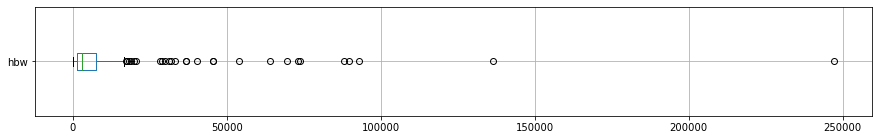

In [38]:
redes = pd.read_csv("files/cdr_od_loc.csv")

df = pd.DataFrame( {"origen":redes["o_loc"].values, 
                    "destino":redes["d_loc"].values, 
                    "dia":np.zeros(len(redes), dtype=int),
                    "hbw":redes["hbw"].values})

df.to_csv("files/net.txt", header = False, index = False, sep=' ')

fig, ax = plt.subplots(figsize=(15,2))
df.boxplot("hbw", vert=False, ax=ax)
df.T.round(1)

#### seeds.txt - Seed - Primeros infectados

In [39]:
casos = pd.read_csv("files/osb_enftransm-covid-19_17042021.csv", nrows=732872, encoding='latin-1', delimiter=";")
casos = casos.rename(columns={"LOCALIDAD_ASIS": 'Localidad',
                             "FECHA_DIAGNOSTICO":'fecha'})
print(casos.head(2))

casos["fecha"] = pd.to_datetime(casos["fecha"], format="%d/%m/%Y")  # to DateTime
dia1 = casos["fecha"].min()  # Primer caso de covid en Bogotá
print(dia1.date())  # 6 de marzo de 2020

tiempo = casos["fecha"] - dia1 # Tiempo transcurrido
casos["dia"] = tiempo.dt.days # To int.

datos = pd.merge(casos, localidades, on='Localidad')  # Uniendo datos by id: "localidades".
Ncasos = datos.groupby(['dia', 'local_id']).size().reset_index(name='# Casos')  # Cantidad de casos

# Semillas: Cantidad de infectados en los primeros 10 dias para cada localidad.
df = Ncasos[Ncasos["dia"]<=10]    
df.to_csv("files/seeds.txt", header = False, index = False, sep=' ')
df.T

   CASO FECHA_DE_INICIO_DE_SINTOMAS       fecha  CIUDAD Localidad  EDAD  \
0     1                  26/02/2020   6/03/2020  Bogotá   Usaquén    19   
1     2                   4/03/2020  10/03/2020  Bogotá  Engativá    22   

   UNI_MED SEXO FUENTE_O_TIPO_DE_CONTAGIO UBICACION      ESTADO  
0        1    F                 Importado      Casa  Recuperado  
1        1    F                 Importado      Casa  Recuperado  
2020-03-06


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
dia,0,4,6,6,7,7,7,7,8,8,8,8,9,9,9,9,9,9,10,10
local_id,1,10,8,9,2,10,11,13,2,9,11,13,1,2,8,10,12,19,1,11
# Casos,1,2,1,1,1,3,1,1,1,1,1,1,3,6,2,1,2,1,1,1


### vaxs.txt - Vacunas - Primeros vacunados
No hace nada aqui. En el código patchsim vaxs está comentado, sin embargo necesita recibir la entrada.

In [40]:
Id = localidades["local_id"].values
df = pd.DataFrame( {"dia": np.zeros(len(Id), dtype=int),
                    "Id_localidades": Id,
                    "vacunados":np.zeros(len(Id), dtype=int)}) 
df.to_csv("files/vaxs.txt", header = False, index = False, sep=' ')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
dia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Id_localidades,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
vacunados,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Llamando función PatchSim

In [41]:
configs = sim.read_config('files/cfg.txt')
sim.run_disease_simulation(configs, write_epi=True)

6503517

In [42]:
infec = np.loadtxt("resultados.out")
infec = pd.DataFrame(infec, index=infec.T[0]).drop(0, axis=1)
infec = infec.sort_index()
infec

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
1.0,8894.0,361041.0,0.0,0.0,0.0,1.0,3.0,5.0,9.0,9.0,...,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0
2.0,1345.0,150823.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,...,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0
3.0,143.0,93785.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,...,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0
4.0,1186.0,256460.0,0.0,0.0,0.0,1.0,2.0,4.0,6.0,9.0,...,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0
5.0,628.0,229690.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,8.0,...,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0
6.0,147.0,124228.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,...,140.0,140.0,140.0,140.0,141.0,141.0,141.0,141.0,141.0,141.0
7.0,1863.0,456564.0,0.0,0.0,0.0,1.0,3.0,6.0,10.0,15.0,...,518.0,518.0,518.0,518.0,518.0,518.0,518.0,518.0,518.0,518.0
8.0,2627.0,727610.0,0.0,0.0,0.0,2.0,4.0,10.0,17.0,22.0,...,825.0,825.0,825.0,825.0,825.0,825.0,825.0,825.0,825.0,825.0
9.0,394.0,271848.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,9.0,...,307.0,307.0,307.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0
10.0,2570.0,614690.0,0.0,0.0,0.0,2.0,5.0,6.0,14.0,19.0,...,697.0,697.0,697.0,697.0,697.0,697.0,698.0,698.0,698.0,698.0


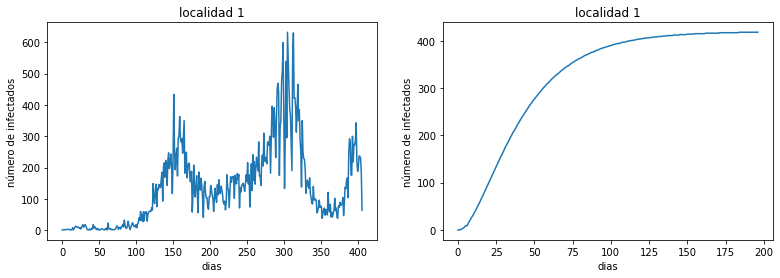

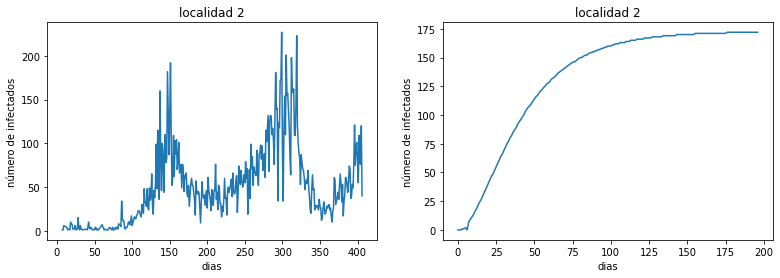

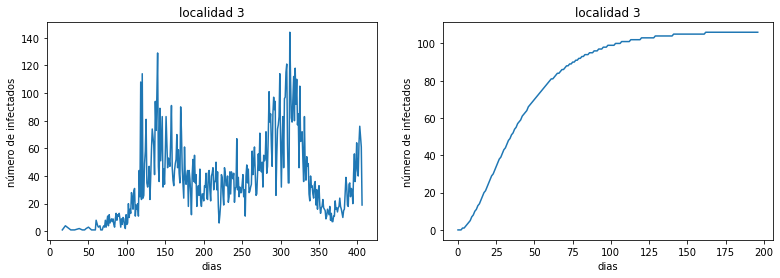

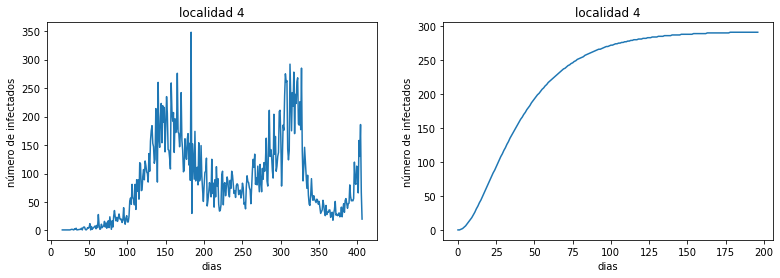

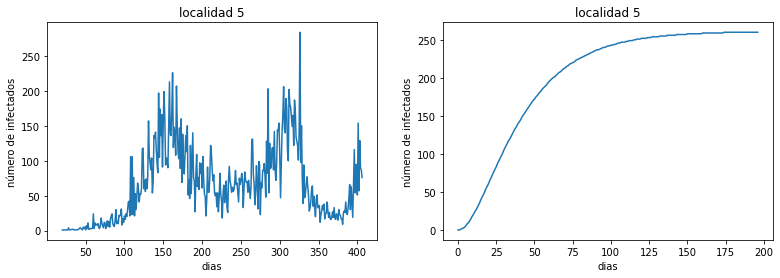

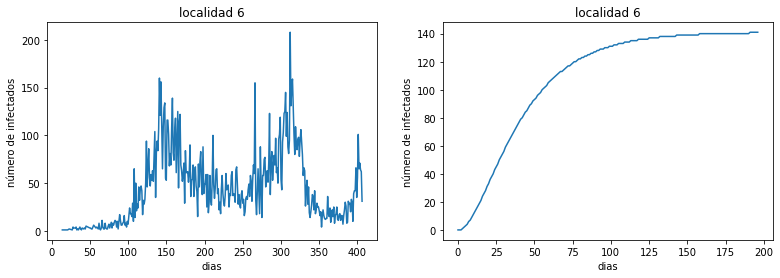

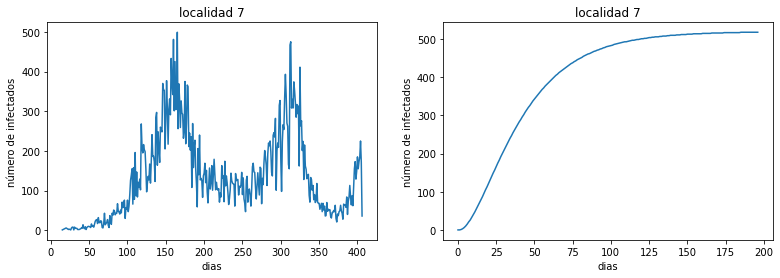

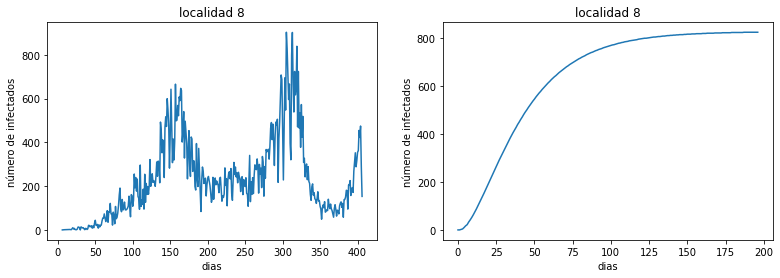

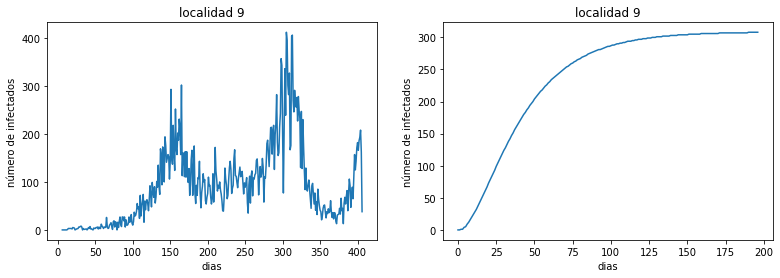

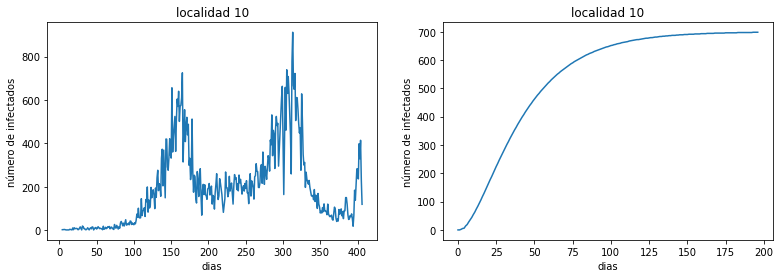

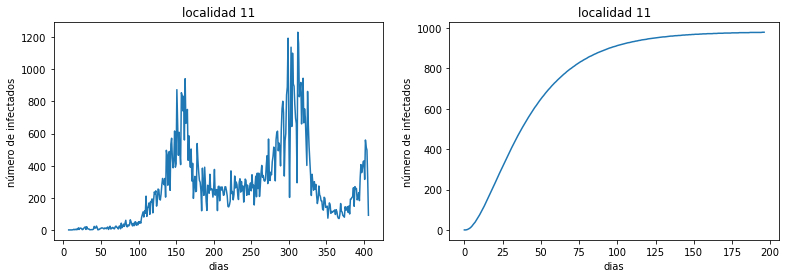

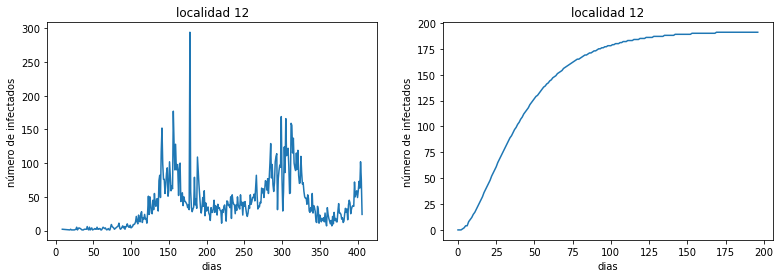

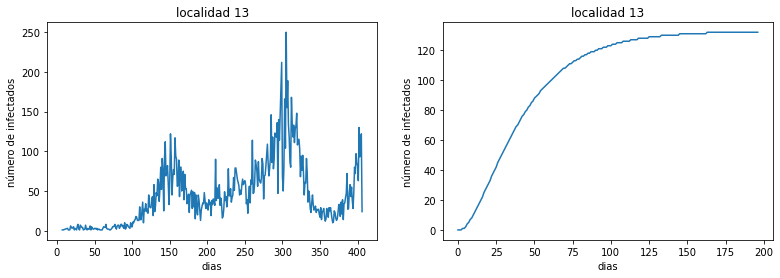

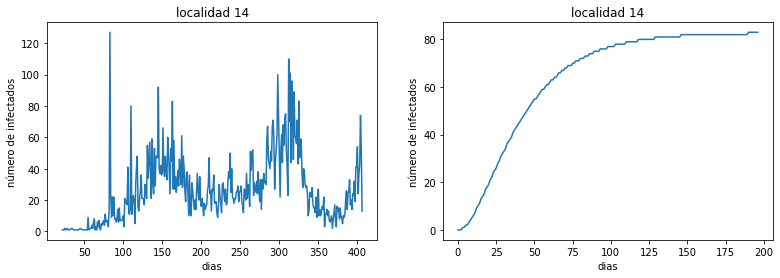

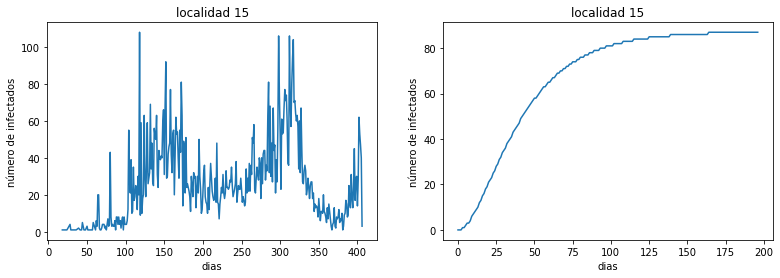

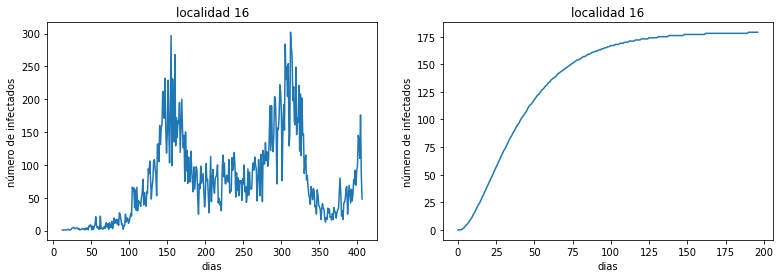

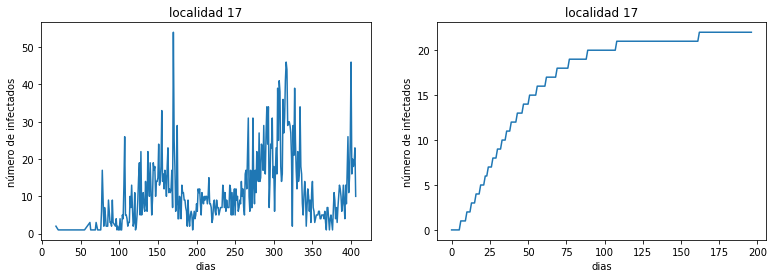

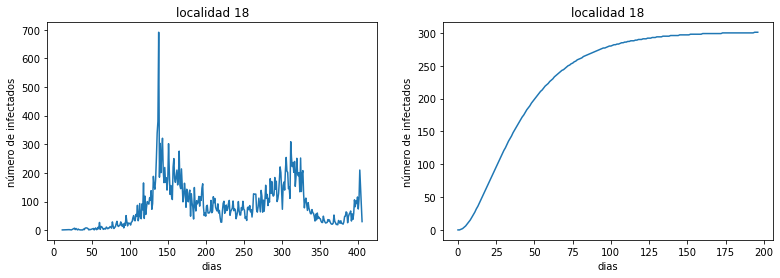

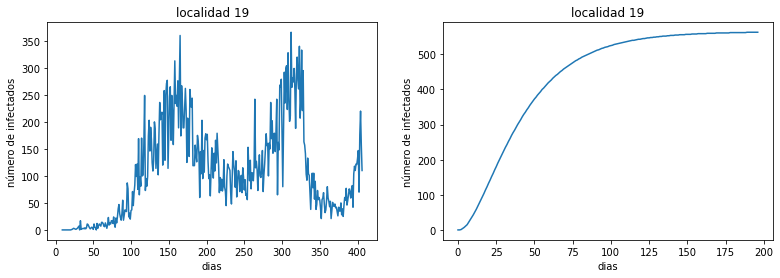

In [46]:
# Graficos

ids = localidades["local_id"].values 
for i in ids:
    
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
    
    # Casos reales
    loc = Ncasos[Ncasos["local_id"]==i] # Localidad i
    tiempo = loc["dia"].values
    casos = loc["# Casos"].values
    ax1.plot(tiempo, casos)
    ax1.set_title("localidad "+str(i))
    ax1.set_xlabel("dias")
    ax1.set_ylabel("número de infectados")
    
    # Casos simulados
    infectados = infec.T[i][3:]
    t = np.arange(0, len(infectados))
    ax2.plot(t, infectados)
    ax2.set_title("localidad "+str(i))
    ax2.set_xlabel("dias")
    ax2.set_ylabel("número de infectados")
    
    plt.show()